In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway
import ast

In [ ]:
file_path = '/content/all_features_final.csv'
df = pd.read_csv(file_path, sep = ';')
df = df.drop('aud_file_name', axis=1)
print(df.head())
print(df.columns)

   Unnamed: 0              txt_file_name  \
0           0  adrso024trimmed_plain.txt   
1           1  adrso025trimmed_plain.txt   
2           2  adrso027trimmed_plain.txt   
3           3  adrso028trimmed_plain.txt   
4           4  adrso031trimmed_plain.txt   

                                                text  classifier  \
0  The cookie jar and the little boy about down o...           1   
1  We're grading and they are going to get some c...           1   
2  There's a little girl and a little boy standin...           1   
3  dishes and Stu is upset you know she's getting...           1   
4  From what I can see, he's going to upset the c...           1   

   repeated_word_count  mistakes  vocabulary_length  lexical_diversity  \
0                   41         8                 88           1.818182   
1                   32        16                105           2.152381   
2                    8         7                 47           1.553191   
3                    5        

In [ ]:
# feature_columns = [
#     'repeated_word_count', 'mistakes', 'vocabulary_length', 'lexical_diversity', 'embeddings',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_amean numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_stddevNorm numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_percentile20.0 numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_percentile50.0 numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_percentile80.0 numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2 numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope numeric',
#     '@attribute F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope numeric',
#     '@attribute loudness_sma3_amean numeric',
#     '@attribute loudness_sma3_stddevNorm numeric',
#     '@attribute loudness_sma3_percentile20.0 numeric',
#     '@attribute loudness_sma3_percentile50.0 numeric',
#     '@attribute loudness_sma3_percentile80.0 numeric',
#     '@attribute loudness_sma3_pctlrange0-2 numeric',
#     '@attribute loudness_sma3_meanRisingSlope numeric',
#     '@attribute loudness_sma3_stddevRisingSlope numeric',
#     '@attribute loudness_sma3_meanFallingSlope numeric',
#     '@attribute loudness_sma3_stddevFallingSlope numeric',
#     '@attribute spectralFlux_sma3_amean numeric',
#     '@attribute spectralFlux_sma3_stddevNorm numeric',
#     '@attribute mfcc1_sma3_amean numeric',
#     '@attribute mfcc1_sma3_stddevNorm numeric',
#     '@attribute mfcc2_sma3_amean numeric',
#     '@attribute mfcc2_sma3_stddevNorm numeric',
#     '@attribute mfcc3_sma3_amean numeric',
#     '@attribute mfcc3_sma3_stddevNorm numeric',
#     '@attribute mfcc4_sma3_amean numeric',
#     '@attribute mfcc4_sma3_stddevNorm numeric',
#     '@attribute jitterLocal_sma3nz_amean numeric',
#     '@attribute jitterLocal_sma3nz_stddevNorm numeric',
#     '@attribute shimmerLocaldB_sma3nz_amean numeric',
#     '@attribute shimmerLocaldB_sma3nz_stddevNorm numeric',
#     '@attribute HNRdBACF_sma3nz_amean numeric',
#     '@attribute HNRdBACF_sma3nz_stddevNorm numeric',
#     '@attribute logRelF0-H1-H2_sma3nz_amean numeric',
#     '@attribute logRelF0-H1-H2_sma3nz_stddevNorm numeric',
#     '@attribute logRelF0-H1-A3_sma3nz_amean numeric',
#     '@attribute logRelF0-H1-A3_sma3nz_stddevNorm numeric',
#     '@attribute F1frequency_sma3nz_amean numeric',
#     '@attribute F1frequency_sma3nz_stddevNorm numeric',
#     '@attribute F1bandwidth_sma3nz_amean numeric',
#     '@attribute F1bandwidth_sma3nz_stddevNorm numeric',
#     '@attribute F1amplitudeLogRelF0_sma3nz_amean numeric',
#     '@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric',
#     '@attribute F2frequency_sma3nz_amean numeric',
#     '@attribute F2frequency_sma3nz_stddevNorm numeric',
#     '@attribute F2bandwidth_sma3nz_amean numeric',
#     '@attribute F2bandwidth_sma3nz_stddevNorm numeric',
#     '@attribute F2amplitudeLogRelF0_sma3nz_amean numeric',
#     '@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric',
#     '@attribute F3frequency_sma3nz_amean numeric',
#     '@attribute F3frequency_sma3nz_stddevNorm numeric',
#     '@attribute F3bandwidth_sma3nz_amean numeric',
#     '@attribute F3bandwidth_sma3nz_stddevNorm numeric',
#     '@attribute F3amplitudeLogRelF0_sma3nz_amean numeric',
#     '@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric',
#     '@attribute alphaRatioV_sma3nz_amean numeric',
#     '@attribute alphaRatioV_sma3nz_stddevNorm numeric',
#     '@attribute hammarbergIndexV_sma3nz_amean numeric',
#     '@attribute hammarbergIndexV_sma3nz_stddevNorm numeric',
#     '@attribute slopeV0-500_sma3nz_amean numeric',
#     '@attribute slopeV0-500_sma3nz_stddevNorm numeric',
#     '@attribute slopeV500-1500_sma3nz_amean numeric',
#     '@attribute slopeV500-1500_sma3nz_stddevNorm numeric',
#     '@attribute spectralFluxV_sma3nz_amean numeric',
#     '@attribute spectralFluxV_sma3nz_stddevNorm numeric',
#     '@attribute mfcc1V_sma3nz_amean numeric',
#     '@attribute mfcc1V_sma3nz_stddevNorm numeric',
#     '@attribute mfcc2V_sma3nz_amean numeric',
#     '@attribute mfcc2V_sma3nz_stddevNorm numeric',
#     '@attribute mfcc3V_sma3nz_amean numeric',
#     '@attribute mfcc3V_sma3nz_stddevNorm numeric',
#     '@attribute mfcc4V_sma3nz_amean numeric',
#     '@attribute mfcc4V_sma3nz_stddevNorm numeric',
#     '@attribute alphaRatioUV_sma3nz_amean numeric',
#     '@attribute hammarbergIndexUV_sma3nz_amean numeric',
#     '@attribute slopeUV0-500_sma3nz_amean numeric',
#     '@attribute slopeUV500-1500_sma3nz_amean numeric',
#     '@attribute spectralFluxUV_sma3nz_amean numeric',
#     '@attribute loudnessPeaksPerSec numeric',
#     '@attribute VoicedSegmentsPerSec numeric',
#     '@attribute MeanVoicedSegmentLengthSec numeric',
#     '@attribute StddevVoicedSegmentLengthSec numeric',
#     '@attribute MeanUnvoicedSegmentLength numeric',
#     '@attribute StddevUnvoicedSegmentLength numeric',
#     '@attribute equivalentSoundLevel_dBp numeric'
# ]

feature_columns = [
    'repeated_word_count', 'mistakes', 'vocabulary_length', 'lexical_diversity', 'embeddings',
    '@attribute loudness_sma3_amean numeric',
    '@attribute loudness_sma3_percentile50.0 numeric',
    '@attribute loudness_sma3_percentile80.0 numeric',
    '@attribute loudness_sma3_stddevRisingSlope numeric',
    '@attribute loudness_sma3_stddevFallingSlope numeric',
    '@attribute mfcc4_sma3_amean numeric',
    '@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric',
    '@attribute F2frequency_sma3nz_stddevNorm numeric',
    '@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric',
    '@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric']

X = df[feature_columns]
y = df['classifier']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
161    0
162    0
163    0
164    0
165    0
Name: classifier, Length: 166, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_lr = model.predict(X_test_scaled)

#evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Logistic Regression Metrics:
Accuracy: 0.72
Precision: 0.7692307692307693
Recall: 0.7142857142857143
F1 Score: 0.7407407407407408


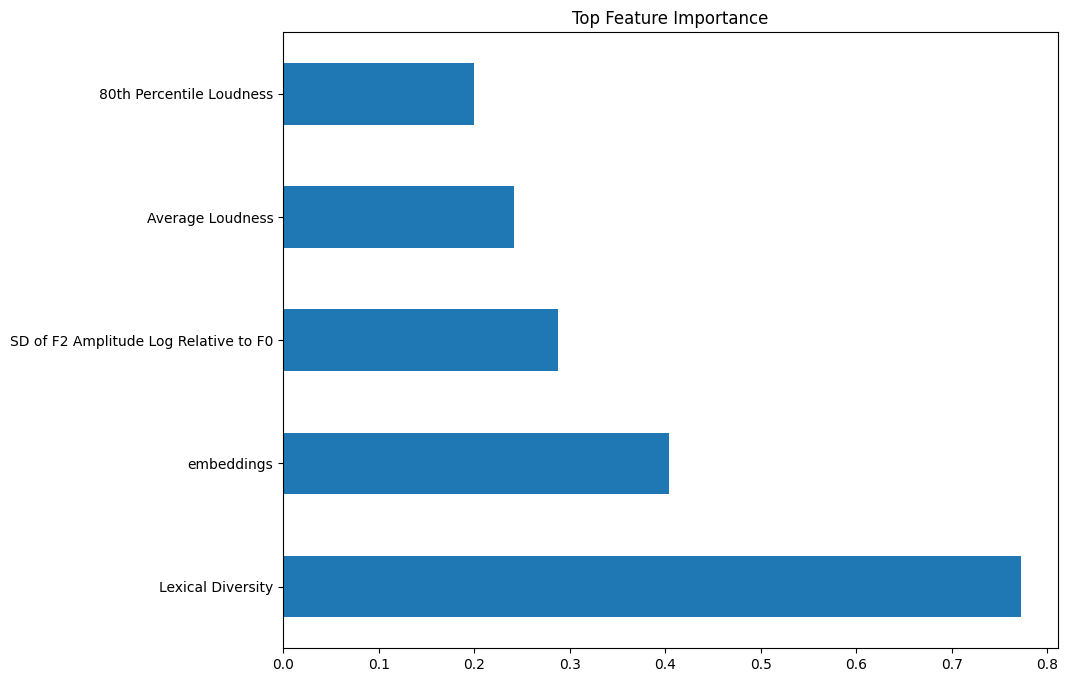

In [ ]:
#feature_columns = [name.replace('@attribute loudness_sma3_amean numeric', 'Average Loudness').replace('@attribute loudness_sma3_percentile50.0 numeric', 'Median Loudness (SMA3)').replace('@attribute loudness_sma3_percentile80.0 numeric', '80th Percentile Loudness (SMA3)').replace('@attribute loudness_sma3_stddevRisingSlope numeric', 'Standard Deviation of Rising Slope Loudness (SMA3)').replace('@attribute loudness_sma3_stddevFallingSlope numeric','Standard Deviation of Falling Slope Loudness (SMA3)').replace('@attribute mfcc4_sma3_amean numeric', 'Average MFCC Coefficient 4 (SMA3)').replace('@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'Standard Deviation of F1 Amplitude Log Relative to F0 (SMA3NZ)').replace('@attribute F2frequency_sma3nz_stddevNorm numeric', 'Standard Deviation of F2 Frequency (SMA3NZ)').replace('@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'Standard Deviation of F2 Amplitude Log Relative to F0 (SMA3NZ)').replace('@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'Standard Deviation of F3 Amplitude Log Relative to F0 (SMA3NZ)').replace('@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'Standard Deviation of F2 Amplitude Log Relative to F0 (SMA3NZ)') for name in feature_columns]
feature_columns = [
    name.replace('@attribute loudness_sma3_amean numeric', 'Average Loudness')
        .replace('@attribute loudness_sma3_percentile50.0 numeric', 'Median Loudness')
        .replace('@attribute loudness_sma3_percentile80.0 numeric', '80th Percentile Loudness')
        .replace('@attribute loudness_sma3_stddevRisingSlope numeric', 'SD of Rising Slope Loudness')
        .replace('@attribute loudness_sma3_stddevFallingSlope numeric', 'SD of Falling\nSlope Loudness')
        .replace('@attribute mfcc4_sma3_amean numeric', 'Average MFCC Coefficient 4')
        .replace('@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'SD of F1 Amplitude\nLog Relative to F0')
        .replace('@attribute F2frequency_sma3nz_stddevNorm numeric', 'SD of F2 Frequency')
        .replace('@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'SD of F2 Amplitude Log Relative to F0')
        .replace('@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric', 'SD of F3 Amplitude\nLog Relative to F0')
        .replace('lexical_diversity', 'Lexical Diversity')
        .replace('vocabulary_length', 'Vocabulary Length')
    for name in feature_columns
]
importance = model.coef_[0]
N = 5
plt.figure(figsize=(10, 8))
feature_importance = pd.Series(importance, index=feature_columns)
top_features = feature_importance.nlargest(N)
top_features.plot(kind='barh')
plt.title('Top Feature Importance')
plt.show()

In [ ]:
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred)
recall_svm = recall_score(y_test, svm_y_pred)
f1_svm = f1_score(y_test, svm_y_pred)

print("\nSVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


SVM:
Accuracy: 0.7
Precision: 0.76
Recall: 0.6785714285714286
F1 Score: 0.7169811320754718


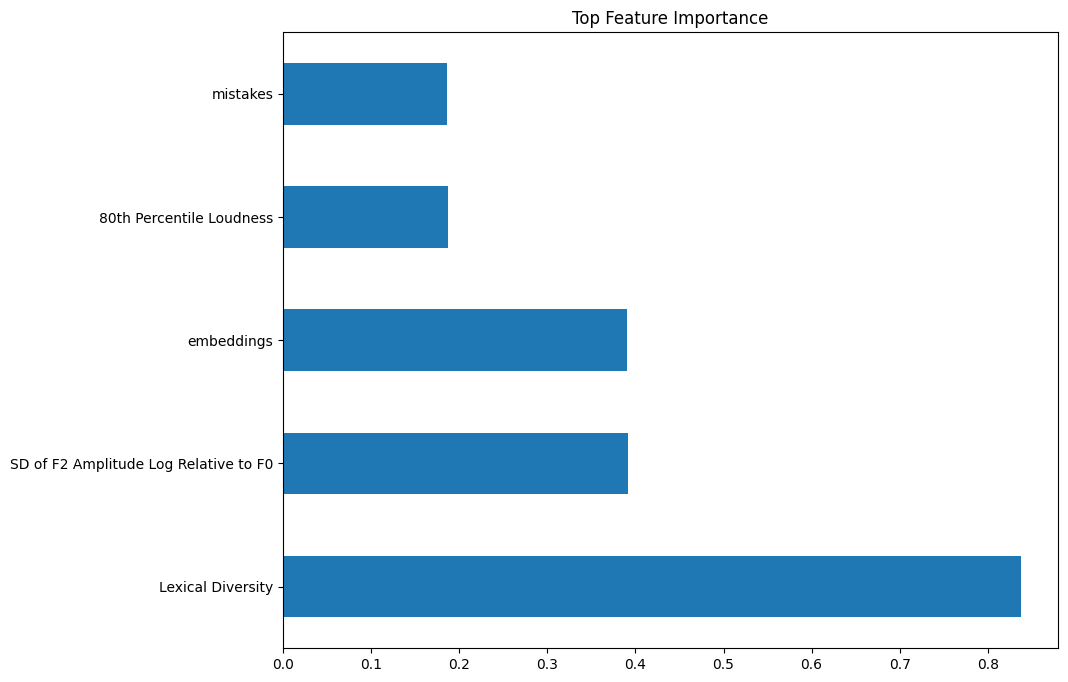

In [ ]:
importance = svm_model.coef_[0]
N = 5
plt.figure(figsize=(10, 8))
feature_importance = pd.Series(importance, index=feature_columns)
top_features = feature_importance.nlargest(N)
top_features.plot(kind='barh')
plt.title('Top Feature Importance')
plt.show()

In [ ]:
#Random Forest classifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

#evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred )
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest:
Accuracy: 0.6
Precision: 0.6538461538461539
Recall: 0.6071428571428571
F1 Score: 0.6296296296296297


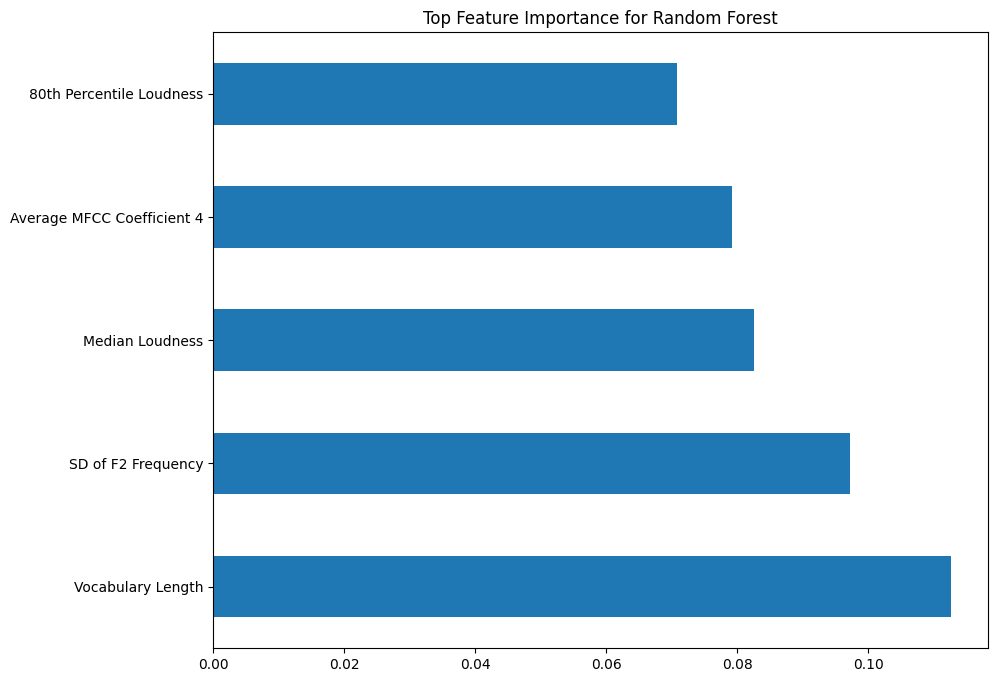

In [ ]:
importance = rf_model.feature_importances_
N = 5
plt.figure(figsize=(10, 8))
feature_importance = pd.Series(importance, index=feature_columns)
top_features = feature_importance.nlargest(N)
top_features.plot(kind='barh')
plt.title('Top Feature Importance for Random Forest')
plt.show()

**Different variations of plots for the visualisation of the most important features**

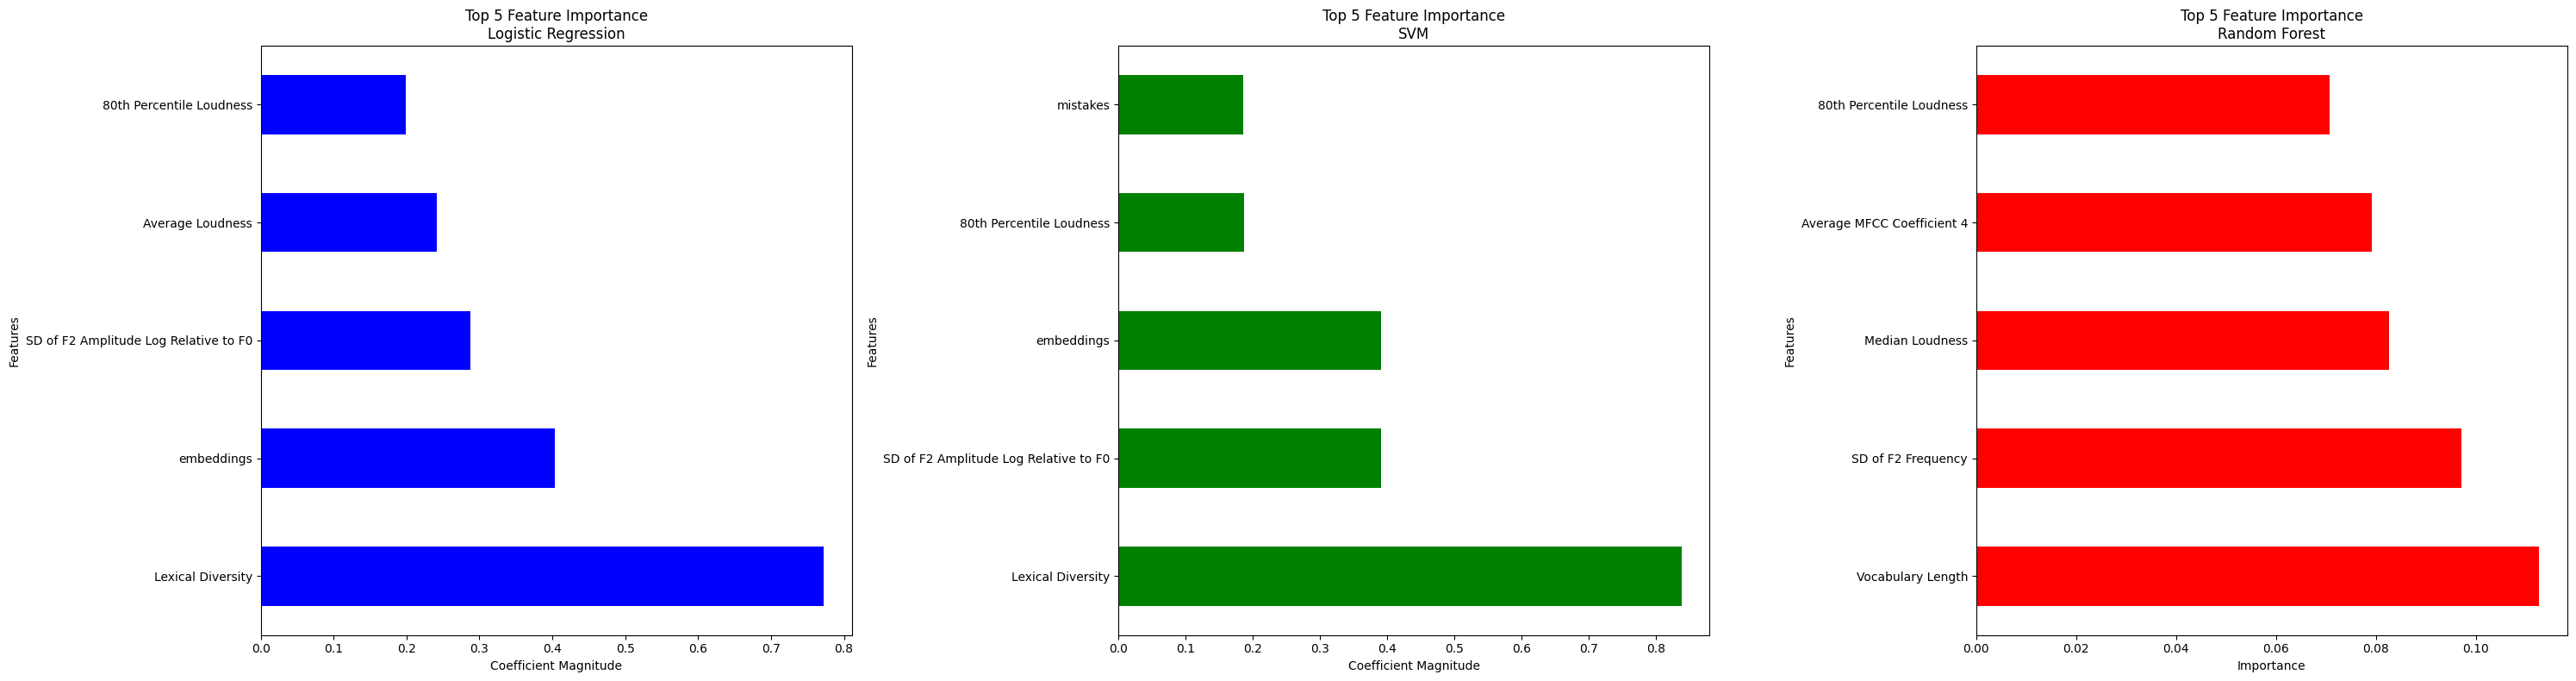

<Figure size 1500x1000 with 0 Axes>

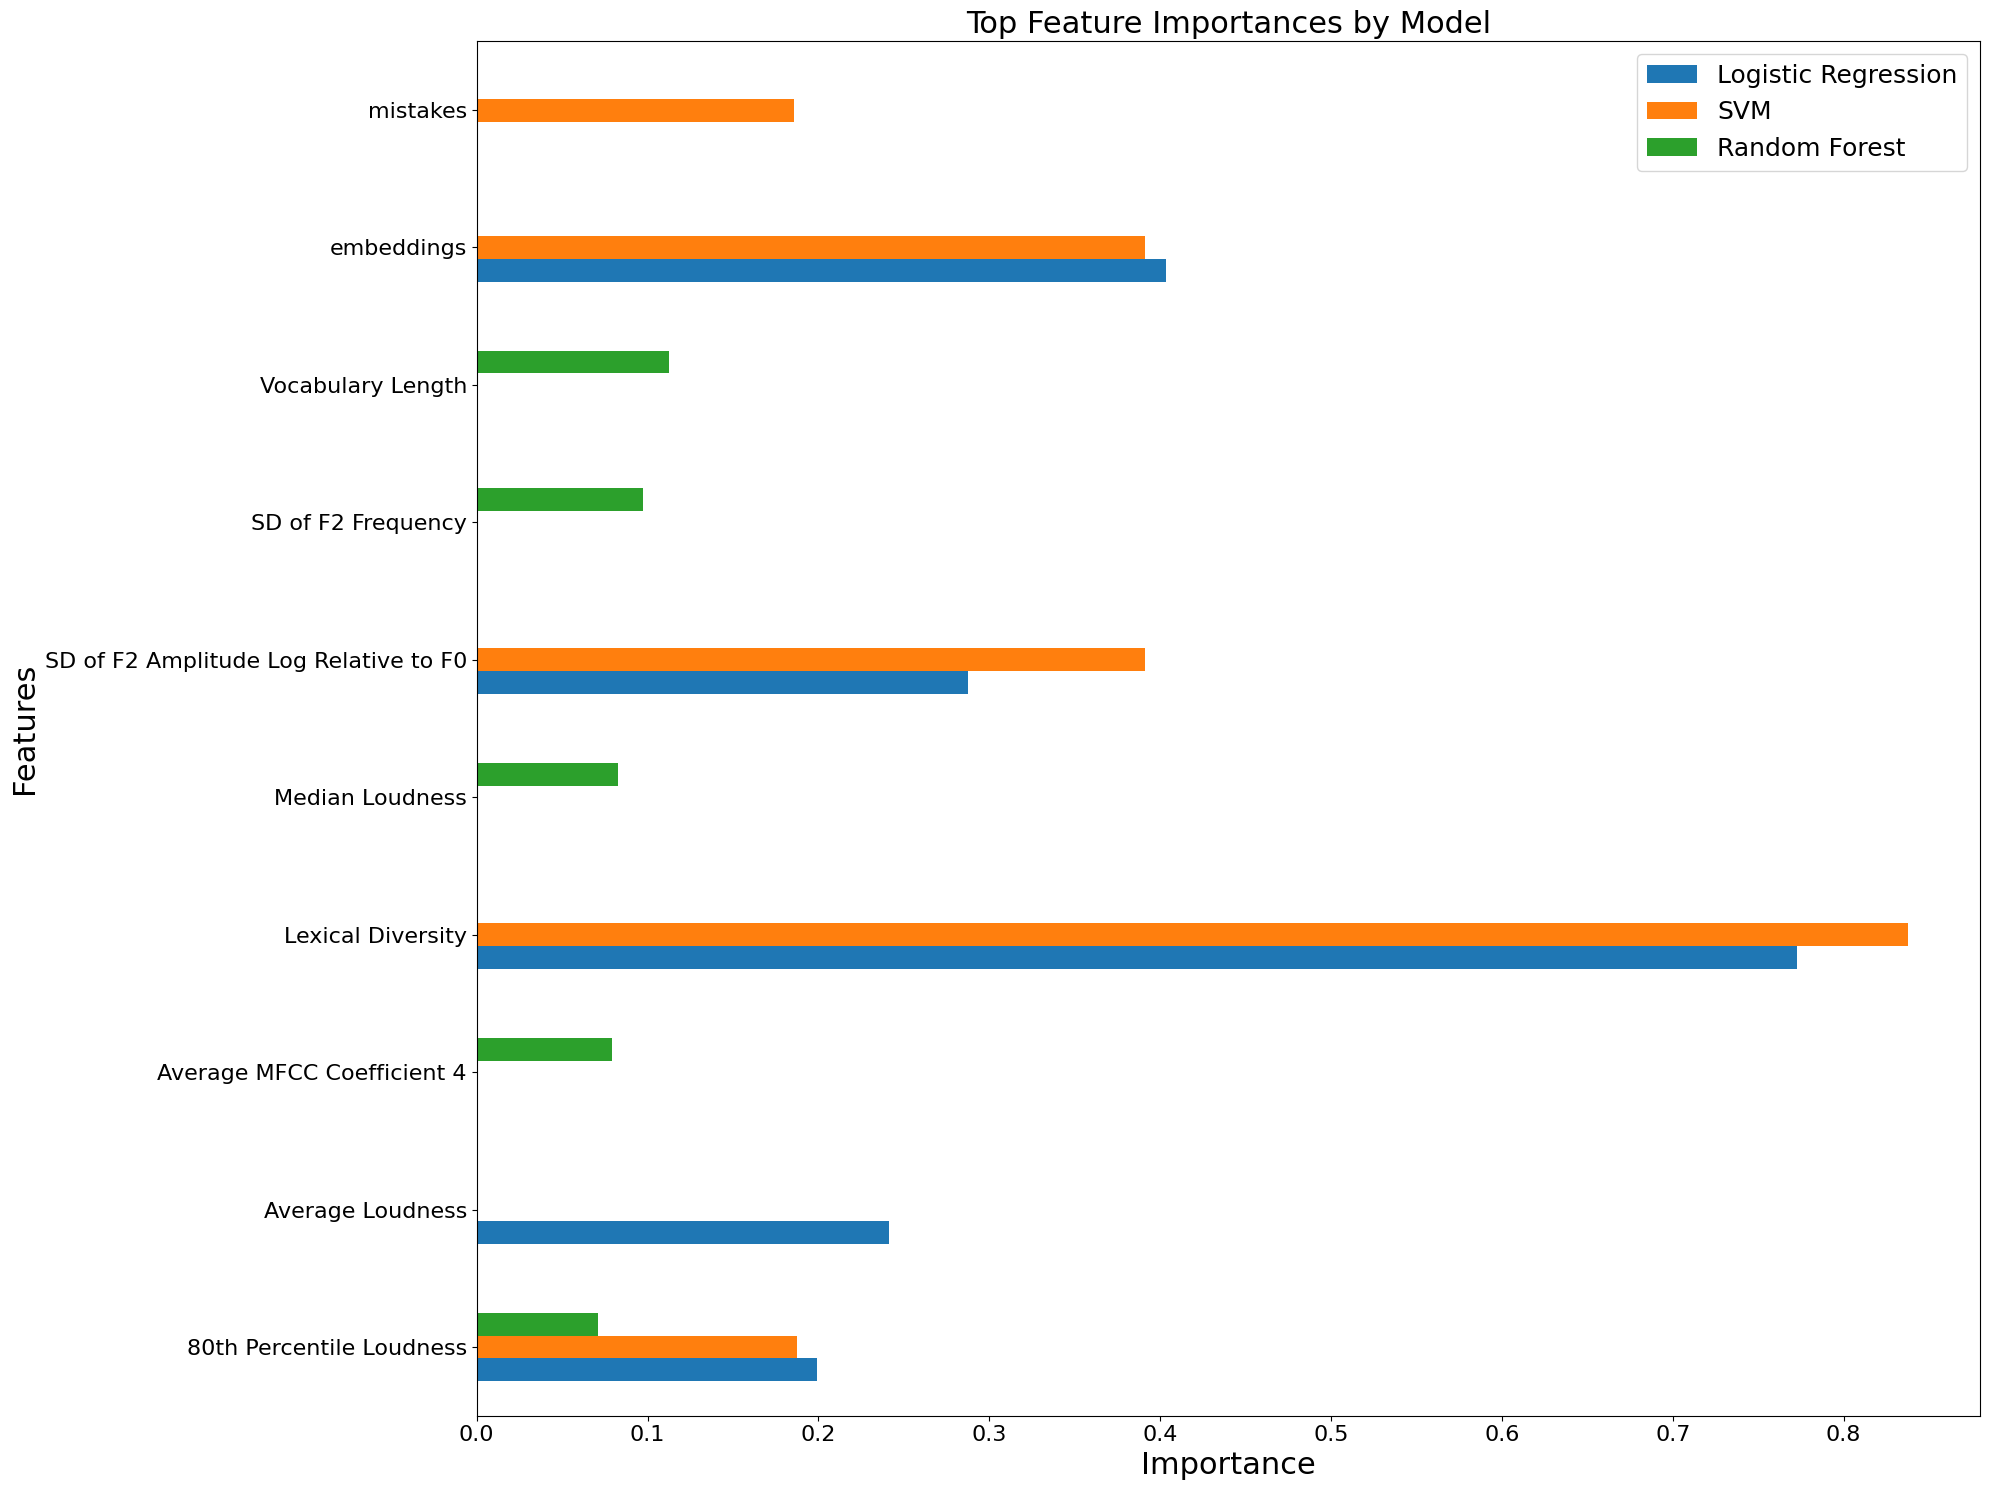

<Figure size 1500x1000 with 0 Axes>

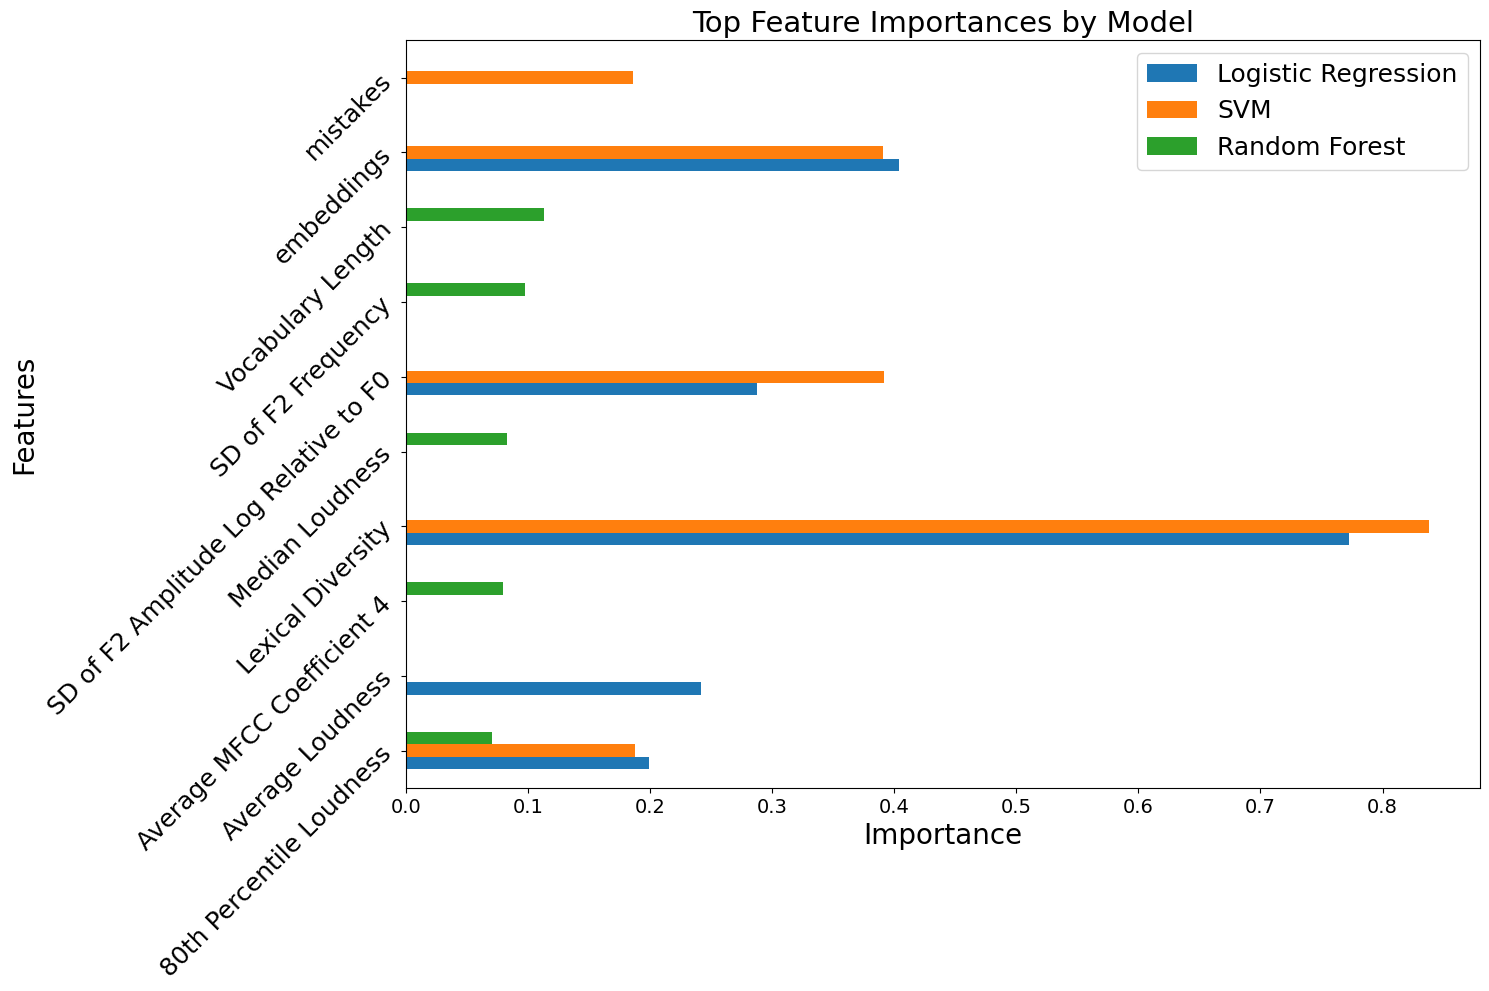

In [ ]:
importance_lr = model.coef_[0]
feature_importance_lr = pd.Series(importance_lr, index=feature_columns)
top_features_lr = feature_importance_lr.nlargest(N)

# Second Model (SVM)
importance_svm = svm_model.coef_[0]
feature_importance_svm = pd.Series(importance_svm, index=feature_columns)
top_features_svm = feature_importance_svm.nlargest(N)

# Third Model (Random Forest)
importance_rf = rf_model.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index=feature_columns)
top_features_rf = feature_importance_rf.nlargest(N)

# Setup the figure and subplots
plt.figure(figsize=(30, 8))

# Plot for Logistic Regression
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
top_features_lr.plot(kind='barh', color='blue')
plt.title('Top 5 Feature Importance\nLogistic Regression')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')

# Plot for SVM
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
top_features_svm.plot(kind='barh', color='green')
plt.title('Top 5 Feature Importance\nSVM')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')

# Plot for Random Forest
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
top_features_rf.plot(kind='barh', color='red')
plt.title('Top 5 Feature Importance\nRandom Forest')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

#bigger plot
importance_lr = model.coef_[0]
feature_importance_lr = pd.Series(importance_lr, index=feature_columns)
top_features_lr = feature_importance_lr.nlargest(N)

importance_svm = svm_model.coef_[0]
feature_importance_svm = pd.Series(importance_svm, index=feature_columns)
top_features_svm = feature_importance_svm.nlargest(N)

importance_rf = rf_model.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index=feature_columns)
top_features_rf = feature_importance_rf.nlargest(N)

# Combine all top features into a single DataFrame
top_features_combined = pd.DataFrame({
    'Logistic Regression': top_features_lr,
    'SVM': top_features_svm,
    'Random Forest': top_features_rf
}).fillna(0)

# Plot the combined feature importances
plt.figure(figsize=(15, 10))
top_features_combined.plot(kind='barh', figsize=(20, 15), fontsize=16)
plt.title('Top Feature Importances by Model', fontsize=22)
plt.xlabel('Importance', fontsize=22)
plt.ylabel('Features', fontsize=22)
plt.legend(loc='best', fontsize=18)

plt.tight_layout()
plt.show()


#another try
importance_lr = model.coef_[0]
feature_importance_lr = pd.Series(importance_lr, index=feature_columns)
top_features_lr = feature_importance_lr.nlargest(N)

importance_svm = svm_model.coef_[0]
feature_importance_svm = pd.Series(importance_svm, index=feature_columns)
top_features_svm = feature_importance_svm.nlargest(N)

importance_rf = rf_model.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index=feature_columns)
top_features_rf = feature_importance_rf.nlargest(N)

top_features_combined = pd.DataFrame({
    'Logistic Regression': top_features_lr,
    'SVM': top_features_svm,
    'Random Forest': top_features_rf
}).fillna(0)

# Plotting the combined feature importances
plt.figure(figsize=(15, 10))
ax = top_features_combined.plot(kind='barh', figsize=(15, 10), fontsize=14)
plt.title('Top Feature Importances by Model', fontsize=21)
plt.xlabel('Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.legend(loc='best', fontsize=18)

# Rotate feature names
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right', fontsize=18)

plt.tight_layout()
plt.show()





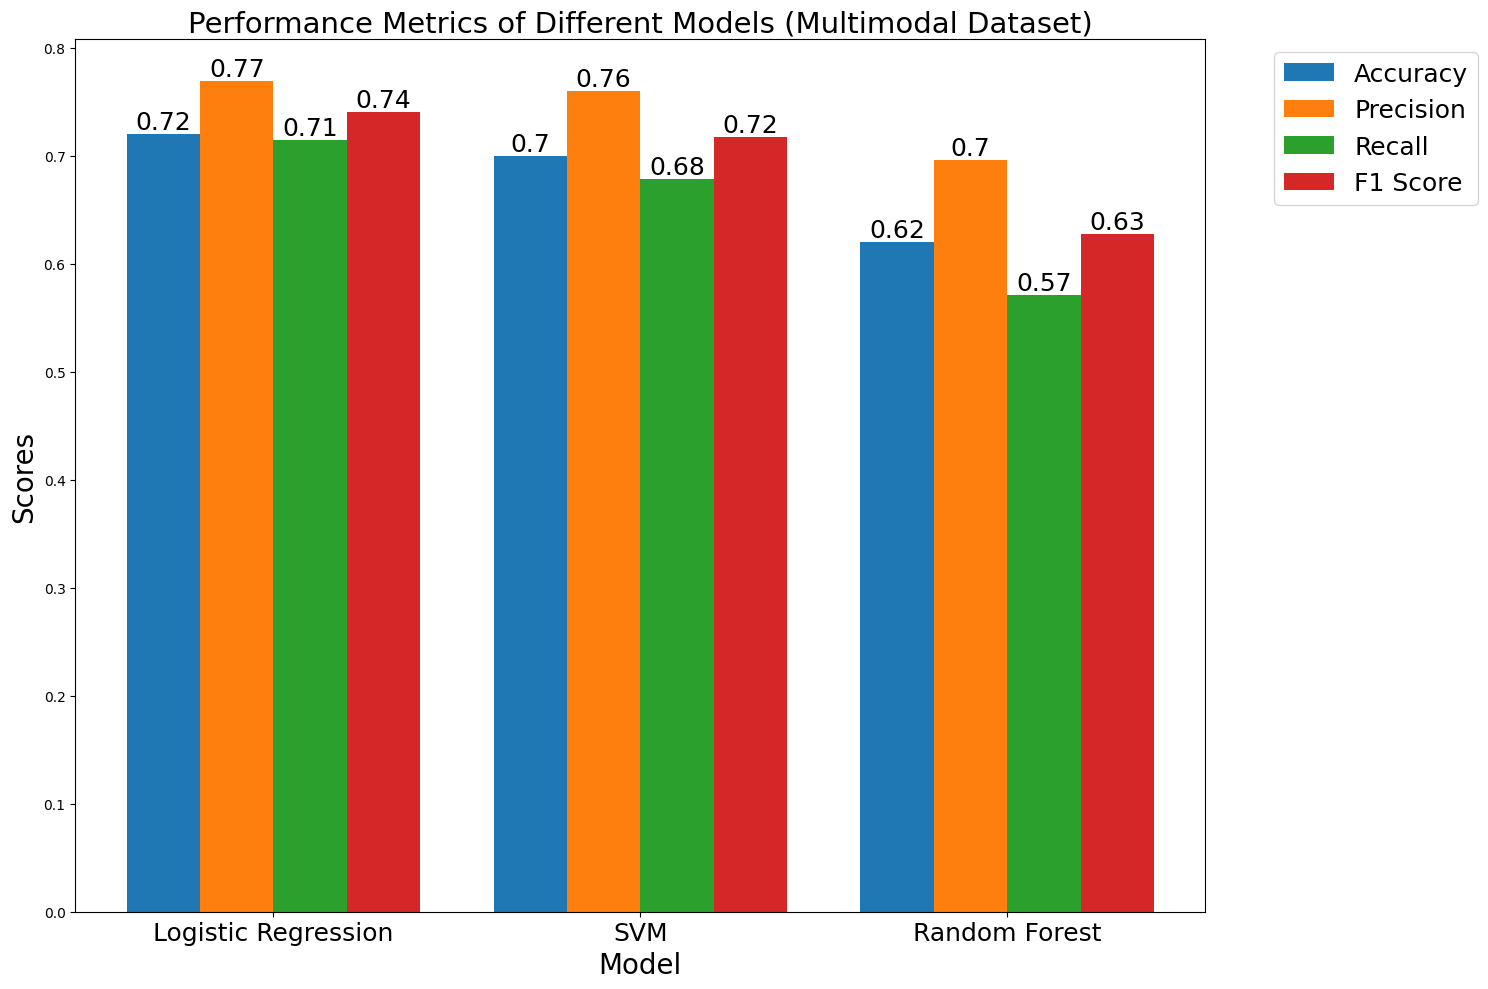

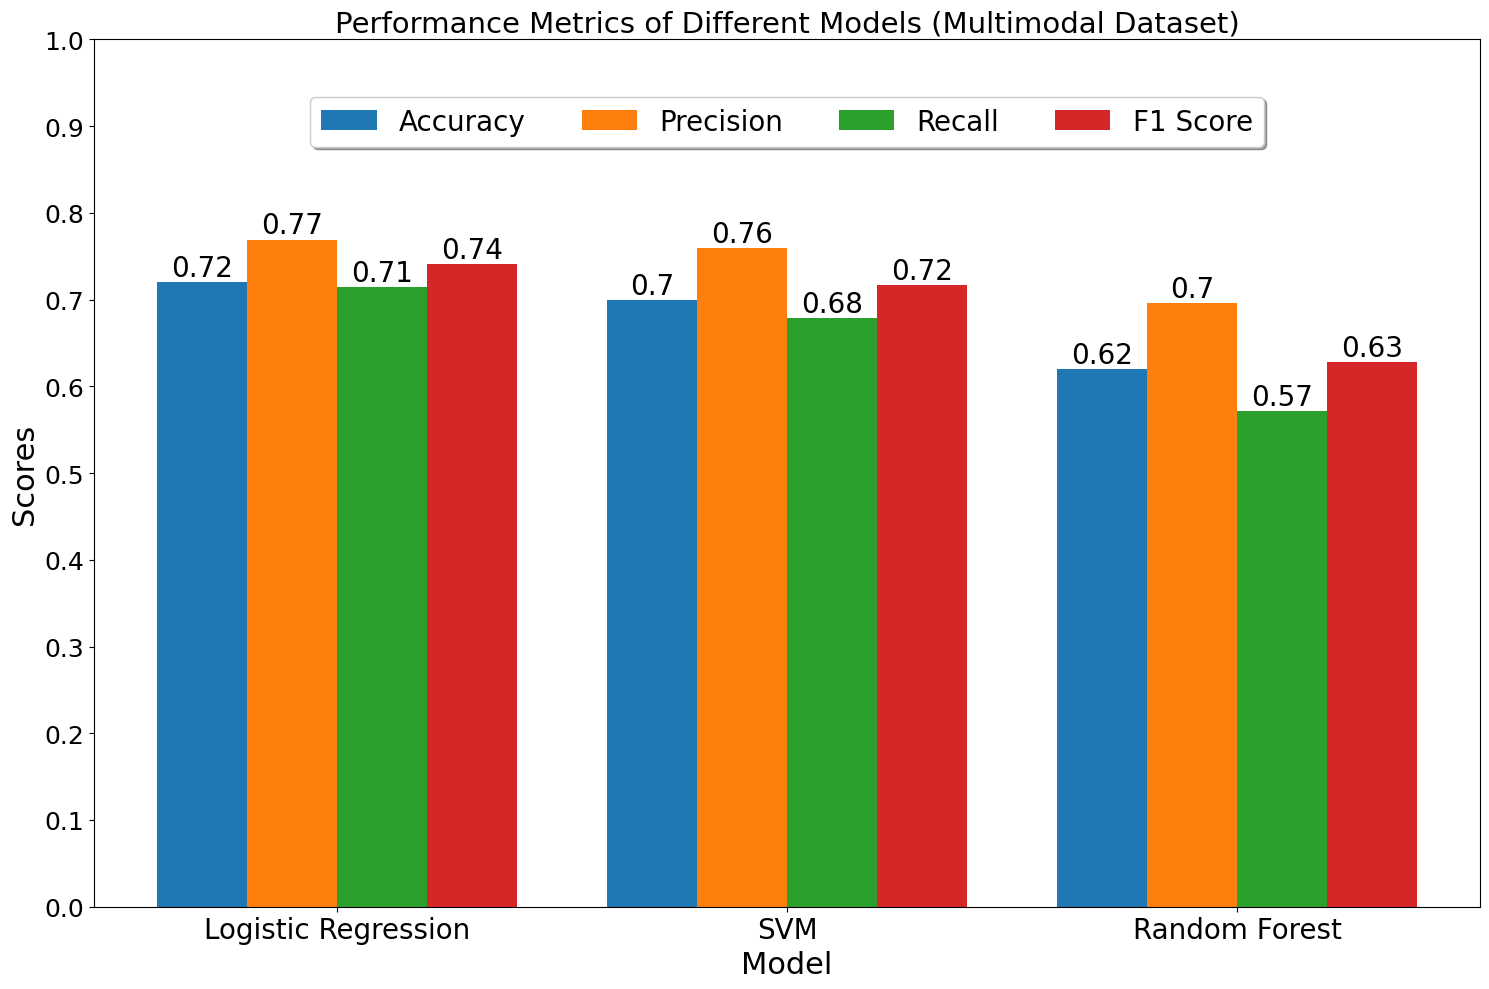

In [ ]:
models = ['Logistic Regression', 'SVM', 'Random Forest']

accuracy_scores = [accuracy_lr, svm_accuracy, rf_accuracy]
precision_scores = [precision_lr, precision_svm, precision_rf]
recall_scores = [recall_lr, recall_svm, recall_rf]
f1_scores = [f1_lr, f1_svm, f1_rf]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(15, 10))

bars1 = plt.bar(index - 1.5*bar_width, accuracy_scores, bar_width, label='Accuracy')
bars2 = plt.bar(index - 0.5*bar_width, precision_scores, bar_width, label='Precision')
bars3 = plt.bar(index + 0.5*bar_width, recall_scores, bar_width, label='Recall')
bars4 = plt.bar(index + 1.5*bar_width, f1_scores, bar_width, label='F1 Score')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize = 18)

plt.xlabel('Model', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Performance Metrics of Different Models (Multimodal Dataset)', fontsize = 21)
plt.xticks(index, models, fontsize = 18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 18)

plt.tight_layout()
plt.show()

models = ['Logistic Regression', 'SVM', 'Random Forest']

accuracy_scores = [accuracy_lr, svm_accuracy, rf_accuracy]
precision_scores = [precision_lr, precision_svm, precision_rf]
recall_scores = [recall_lr, recall_svm, recall_rf]
f1_scores = [f1_lr, f1_svm, f1_rf]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(15, 10))

bars1 = plt.bar(index - 1.5*bar_width, accuracy_scores, bar_width, label='Accuracy')
bars2 = plt.bar(index - 0.5*bar_width, precision_scores, bar_width, label='Precision')
bars3 = plt.bar(index + 0.5*bar_width, recall_scores, bar_width, label='Recall')
bars4 = plt.bar(index + 1.5*bar_width, f1_scores, bar_width, label='F1 Score')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize = 20)

plt.xlabel('Model', fontsize = 22)
plt.ylabel('Scores', fontsize = 22)
plt.title('Performance Metrics of Different Models (Multimodal Dataset)', fontsize = 21)
plt.xticks(index, models, fontsize = 20)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.ylim(0, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4, fontsize = 20)

plt.tight_layout()
plt.show()

**External Validation:**

In [ ]:
feature_columns = [
    'repeated_word_count', 'mistakes', 'vocabulary_length', 'lexical_diversity', 'embeddings',
    '@attribute loudness_sma3_amean numeric',
    '@attribute loudness_sma3_percentile50.0 numeric',
    '@attribute loudness_sma3_percentile80.0 numeric',
    '@attribute loudness_sma3_stddevRisingSlope numeric',
    '@attribute loudness_sma3_stddevFallingSlope numeric',
    '@attribute mfcc4_sma3_amean numeric',
    '@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric',
    '@attribute F2frequency_sma3nz_stddevNorm numeric',
    '@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric',
    '@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric']

# Select the features from the DataFrame
X = df[feature_columns]
# Selecting labels (3rd column)
y = df['classifier']  # Index is 2
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
161    0
162    0
163    0
164    0
165    0
Name: classifier, Length: 166, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score
# Step 1: Load the new external validation dataset
external_validation_path = '/content/all_features_ext_val.csv'
df_external = pd.read_csv(external_validation_path, sep=';')
#print(df_external.head())

# Step 2: Prepare the external dataset
X_external = df_external[feature_columns]
X_external_scaled = scaler.transform(X_external)
y_external = df_external['classifier']

logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train_scaled, y_train)
y_pred_external_lr = logistic_regression.predict(X_external_scaled)

# Evaluation
accuracy_external = accuracy_score(y_external, y_pred_external_lr)
precision_external = precision_score(y_external, y_pred_external_lr)
recall_external = recall_score(y_external, y_pred_external_lr)
f1_external = f1_score(y_external, y_pred_external_lr)
balanced_accuracy_external = balanced_accuracy_score(y_external, y_pred_external_lr)

print("External Validation Metrics:")
print("Accuracy:", accuracy_external)
print("Precision:", precision_external)
print("Recall:", recall_external)
print("F1 Score:", f1_external)
print("Balanced Accuracy:", balanced_accuracy_external)

External Validation Metrics:
Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Balanced Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_external = svm_model.predict(X_external_scaled)

# Evaluation on the external validation dataset
accuracy_external = accuracy_score(y_external, y_pred_external)
precision_external = precision_score(y_external, y_pred_external)
recall_external = recall_score(y_external, y_pred_external)
f1_external = f1_score(y_external, y_pred_external)

print("External Validation Metrics:")
print("Accuracy:", accuracy_external)
print("Precision:", precision_external)
print("Recall:", recall_external)
print("F1 Score:", f1_external)

External Validation Metrics:
Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random Forest classifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

#evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred )
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest:
Accuracy: 0.62
Precision: 0.6956521739130435
Recall: 0.5714285714285714
F1 Score: 0.6274509803921569
